## Juntando as redes de cada seed



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [17]:
import networkx as nx

# Carregar os grafos a partir dos arquivos .graphml
G1 = nx.read_graphml('/content/drive/MyDrive/C&T/2024.1/AED2/week9/assets/telemedicine.graphml')
G2 = nx.read_graphml('/content/drive/MyDrive/C&T/2024.1/AED2/week9/assets/ehr.graphml')
G3 = nx.read_graphml('/content/drive/MyDrive/C&T/2024.1/AED2/week9/assets/hie.graphml')

# Fundir os grafos
G_combined = nx.compose(G1, G2)
G_combined = nx.compose(G_combined, G3)

# Salvar o grafo fundido em um novo arquivo .graphml
nx.write_graphml(G_combined, 'fused_graph.graphml')

In [ ]:
len(G_combined.edges), len(G_combined.nodes)

(183776, 33490)

##Requisito 2
A partir da rede construída gerar uma figura similar utilizando o Gephi.

## Requisito 3

A partir da rede construída gerar um histograma considerando o in-Degree dos vértices da rede.

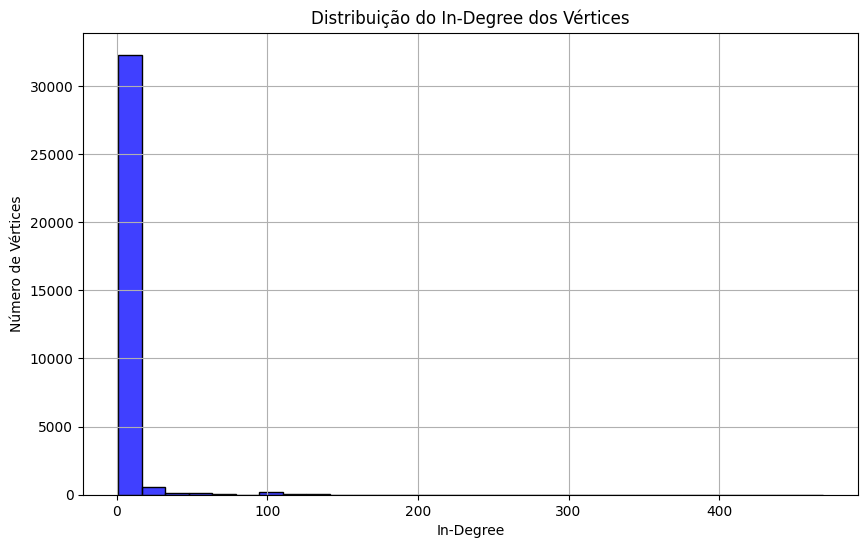

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados exportados do Gephi
df = pd.read_csv('fused_graph.csv')

# Extrair o In-Degree
in_degree = df['indegree']

# Plotar a distribuição do in-Degree
plt.figure(figsize=(10, 6))
sns.histplot(in_degree, kde=False, bins=30, color='blue')

plt.title('Distribuição do In-Degree dos Vértices')
plt.xlabel('In-Degree')
plt.ylabel('Número de Vértices')
plt.grid(True)
plt.show()

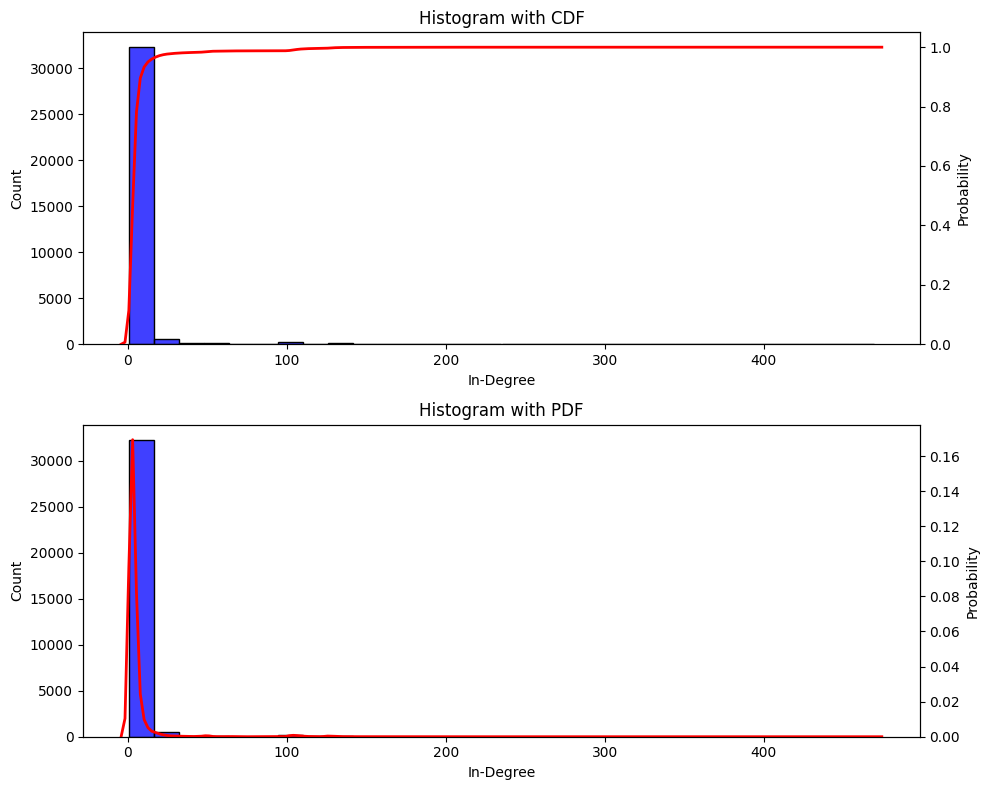

In [14]:
import numpy as np

plt.figure(figsize=(10, 8))

#Criar o histograma e a CDF
plt.subplot(2, 1, 1)
sns.histplot(in_degree, bins=30, kde=False, stat='count', color='blue', label='Histograma')
plt.xlabel('In-Degree')
plt.ylabel('Count')
plt.title('Histogram with CDF')

# Adicionar a linha da CDF
ax1 = plt.gca()  # Obter o eixo atual
ax2 = ax1.twinx()  # Criar um segundo eixo y compartilhado com o eixo x
sns.kdeplot(in_degree, cumulative=True, color='red', lw=2, ax=ax2, label='CDF')
ax2.set_ylabel('Probability')

# Criar o histograma e a PDF
plt.subplot(2, 1, 2)
sns.histplot(in_degree, bins=30, kde=False, stat='count', color='blue', label='Histograma')
plt.xlabel('In-Degree')
plt.ylabel('Count')
plt.title('Histogram with PDF')

# Adicionar a linha da PDF
ax3 = plt.gca()  # Obter o eixo atual
ax4 = ax3.twinx()  # Criar um segundo eixo y compartilhado com o eixo x
sns.kdeplot(in_degree, cumulative=False, color='red', lw=2, ax=ax4, label='PDF')
ax4.set_ylabel('Probability')

# Ajustar layout e mostrar a figura
plt.tight_layout()
plt.show()

## Requisito 4

In [36]:
import networkx as nx
import csv

# Calcular o k-core
k_core = nx.core_number(G_combined)

# Exportar o k-core para um arquivo CSV
with open('k_core.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'K-Core']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for node, core in k_core.items():
        writer.writerow({'Id': node, 'K-Core': core})

# Calcular o k-shell (aqui k-shell é basicamente o mesmo que o k-core)
# Não há uma função direta para k-shell, mas você pode tratar k-shell como k-core para cada nível
k_shell = {}
for node, core in k_core.items():
    k_shell[node] = core  # Aqui você está basicamente tratando k-shell como k-core

# Exportar o k-shell para um arquivo CSV
with open('k_shell.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'K-Shell']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for node, shell in k_shell.items():
        writer.writerow({'Id': node, 'K-Shell': shell})


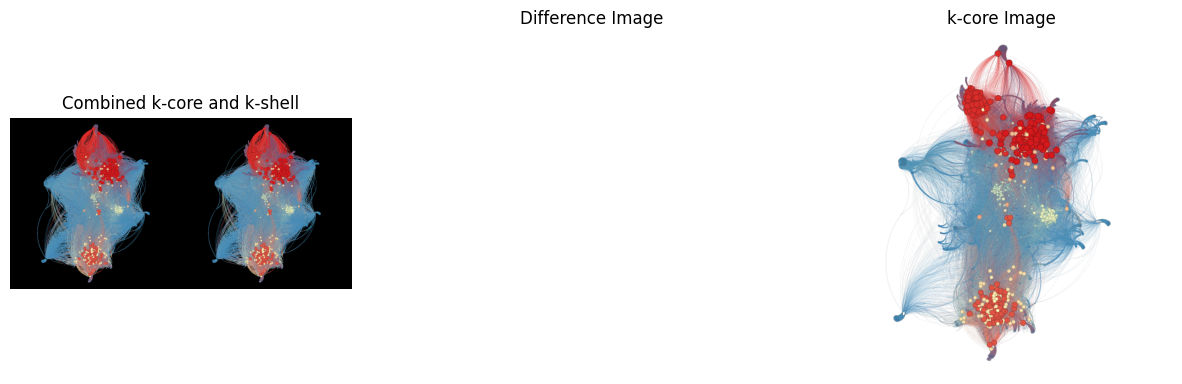

In [26]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

# Carregar as imagens
img_kcore = Image.open("k-core.png")
img_kshell = Image.open("k-shell.png")

# Redimensionar as imagens para ter o mesmo tamanho (se necessário)
img_kcore = img_kcore.resize(img_kshell.size)

# Combinar as imagens lado a lado
combined_width = img_kcore.width + img_kshell.width
combined_height = max(img_kcore.height, img_kshell.height)
combined_img = Image.new('RGB', (combined_width, combined_height))

# Colocar as imagens lado a lado
combined_img.paste(img_kcore, (0, 0))
combined_img.paste(img_kshell, (img_kcore.width, 0))

# Salvar a imagem combinada
combined_img.save("combined_image.png")

# Calcular a diferença entre as imagens
diff = ImageChops.difference(img_kcore, img_kshell)

# Salvar a imagem de diferença
diff.save("difference_image.png")

# Exibir as imagens usando matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Exibir imagem combinada
axs[0].imshow(combined_img)
axs[0].set_title("Combined k-core and k-shell")
axs[0].axis('off')

# Exibir imagem de diferença
axs[1].imshow(diff, cmap='gray')
axs[1].set_title("Difference Image")
axs[1].axis('off')

# Exibir imagens originais
axs[2].imshow(img_kcore)
axs[2].set_title("k-core Image")
axs[2].axis('off')

plt.show()